# 这个文件用于数据处理

## 1. 数据初处理

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import datasets
import warnings
warnings.filterwarnings('ignore')

In [2]:
import GEOparse
gse = GEOparse.get_GEO(geo="GSE63990", destdir="./", silent=True)
GPL571 = gse.gpls['GPL571'] # 准备对照表，准备把ID转换为基因名

In [3]:
gse_csv = pd.read_csv('GSE63990.csv')
gse_csv.head() # 预览数据

,infection_status,1007_s_at,1053_at,117_at,121_at,1255_g_at,1294_at,1316_at,1320_at,1405_i_at,...,AFFX-r2-Bs-thr-M_s_at,AFFX-r2-Ec-bioB-3_at,AFFX-r2-Ec-bioB-5_at,AFFX-r2-Ec-bioB-M_at,AFFX-r2-Ec-bioC-3_at,AFFX-r2-Ec-bioC-5_at,AFFX-r2-Ec-bioD-3_at,AFFX-r2-Ec-bioD-5_at,AFFX-r2-P1-cre-3_at,AFFX-r2-P1-cre-5_at
0,non-infectious illness,107.026284,158.817338,2545.754898,186.244424,13.132469,643.402073,34.615676,17.490946,2929.019555,...,17.173226,422.464901,566.805882,481.918815,1421.477295,1302.020303,6250.362334,3836.600257,17740.725022,14961.589573
1,non-infectious illness,221.020421,124.644738,2143.929143,324.223899,15.427804,1001.622909,49.833883,22.848206,5667.531661,...,17.962223,652.117965,800.852865,822.133404,2305.851262,2008.050881,8731.397156,5399.129367,19067.890695,17285.989865
2,non-infectious illness,137.091142,115.353642,1741.194207,299.526479,13.588461,549.283988,47.869510,18.544460,3186.032084,...,17.282754,483.392556,566.237470,586.430031,1792.943487,1330.467773,7401.441597,4578.962962,18303.281696,15753.041045
3,non-infectious illness,126.175162,98.119250,1316.526914,326.999326,12.738011,339.984798,51.808930,19.624606,5535.493091,...,17.651712,1275.694498,1781.291882,1547.788940,3845.464156,3549.057271,11770.475723,7924.052042,23370.081259,19856.779557
4,bacterial,105.348086,260.359324,2930.300695,223.766173,12.436344,409.723526,35.071703,19.844859,581.984161,...,18.275624,404.702873,518.880900,477.676689,1299.615932,1186.047735,5968.686731,3780.851630,18440.196387,15535.017110


In [4]:
gse_csv.isnull().sum() # 看一下有没有缺失的项，看起来没有缺失

infection_status        0
1007_s_at               0
1053_at                 0
117_at                  0
121_at                  0
                       ..
AFFX-r2-Ec-bioC-5_at    0
AFFX-r2-Ec-bioD-3_at    0
AFFX-r2-Ec-bioD-5_at    0
AFFX-r2-P1-cre-3_at     0
AFFX-r2-P1-cre-5_at     0
Length: 22278, dtype: int64

In [5]:
gse_csv.info() # 看一下基础信息，多少行多少列什么的

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 280 entries, 0 to 279
Columns: 22278 entries, infection_status to AFFX-r2-P1-cre-5_at
dtypes: float64(22277), object(1)
memory usage: 47.6+ MB


In [6]:
gse_csv.describe() # 数据的统计特征

,1007_s_at,1053_at,117_at,121_at,1255_g_at,1294_at,1316_at,1320_at,1405_i_at,1431_at,...,AFFX-r2-Bs-thr-M_s_at,AFFX-r2-Ec-bioB-3_at,AFFX-r2-Ec-bioB-5_at,AFFX-r2-Ec-bioB-M_at,AFFX-r2-Ec-bioC-3_at,AFFX-r2-Ec-bioC-5_at,AFFX-r2-Ec-bioD-3_at,AFFX-r2-Ec-bioD-5_at,AFFX-r2-P1-cre-3_at,AFFX-r2-P1-cre-5_at
count,280.000000,280.000000,280.000000,280.000000,280.000000,280.000000,280.000000,280.000000,280.000000,280.000000,...,280.000000,280.000000,280.000000,280.000000,280.000000,280.000000,280.000000,280.000000,280.000000,280.000000
mean,165.631442,130.740009,2236.350260,364.108250,13.540978,652.112480,47.259380,19.895041,3448.988024,15.372574,...,17.960648,607.332519,901.026826,873.938972,2564.283287,2032.087547,9049.325373,6003.580410,20711.782902,19113.436652
std,54.399462,30.855880,1020.289472,161.458720,1.858646,319.702021,12.298700,2.461557,2033.044366,1.606974,...,3.415685,393.785474,576.839561,553.130006,1274.000237,1117.079105,3065.586454,2332.105641,3456.412319,4035.397323
min,70.815033,62.482569,547.160196,137.763769,10.141081,179.769213,24.427230,14.596370,441.064964,12.114427,...,12.250326,117.046078,88.813649,96.682388,324.500125,270.356249,1310.217547,1007.410165,6940.705932,5257.953071
25%,118.610693,109.106194,1492.036620,228.333765,12.130430,409.437572,36.638510,18.502875,1980.405569,14.305639,...,15.318730,413.743277,558.739753,513.103755,1539.169334,1348.175630,7149.787801,4643.006957,18877.231664,16279.937228
50%,161.824602,126.165278,1989.193107,299.788834,13.249392,581.879854,45.509423,19.499449,3166.629426,15.193815,...,17.550049,564.782753,870.563359,864.796010,2730.474414,2006.213733,9544.845048,6201.995455,21361.827523,20467.394154
75%,208.826220,149.591965,2813.684010,485.465435,14.585919,809.303849,56.137788,20.937420,4471.564211,16.105127,...,19.572283,677.932522,1050.809938,1047.814521,3262.325534,2389.964247,10799.861528,7037.540798,22745.706969,21934.027237
max,300.442602,276.673083,7086.883002,837.532837,22.848622,2092.180445,85.370946,34.411306,14617.385297,23.960545,...,33.334236,4358.241783,5679.057997,5594.920631,10191.097456,10355.920179,22907.286456,18998.651749,31532.037173,29547.050259


In [7]:
# show the values of the column 'infection_status'
gse_csv['infection_status'].value_counts() # 看一下感染这个列的分布

viral                     117
non-infectious illness     90
bacterial                  73
Name: infection_status, dtype: int64

In [8]:
# drop if the value of the column 'infection_status' is 'non-infectious illness'
# And map the values of the column 'infection_status' to 0 and 1
# 0: viral
# 1: bacterial
gse_csv = gse_csv[gse_csv['infection_status'] != 'non-infectious illness'] # 去掉非感染的
gse_csv['infection_status'] = gse_csv['infection_status'].map({'viral': 0, 'bacterial': 1}) # 感染的映射为0和1
gse_csv.head()

,infection_status,1007_s_at,1053_at,117_at,121_at,1255_g_at,1294_at,1316_at,1320_at,1405_i_at,...,AFFX-r2-Bs-thr-M_s_at,AFFX-r2-Ec-bioB-3_at,AFFX-r2-Ec-bioB-5_at,AFFX-r2-Ec-bioB-M_at,AFFX-r2-Ec-bioC-3_at,AFFX-r2-Ec-bioC-5_at,AFFX-r2-Ec-bioD-3_at,AFFX-r2-Ec-bioD-5_at,AFFX-r2-P1-cre-3_at,AFFX-r2-P1-cre-5_at
4,1,105.348086,260.359324,2930.300695,223.766173,12.436344,409.723526,35.071703,19.844859,581.984161,...,18.275624,404.702873,518.880900,477.676689,1299.615932,1186.047735,5968.686731,3780.851630,18440.196387,15535.017110
8,1,117.966262,155.368821,3960.321313,232.937710,12.291060,268.529399,35.330680,18.836610,1183.990090,...,15.854200,325.053728,414.681571,404.296541,1238.917847,925.536531,4853.316801,3129.657248,16779.113562,13370.420699
9,1,76.522752,165.680666,1863.592572,195.818225,13.239240,407.588152,31.311397,17.179513,441.064964,...,21.644487,518.351118,682.958155,596.438491,1571.250251,1352.416530,6453.361642,4420.693328,18730.826505,16239.062657
10,0,151.713626,134.508139,2961.309570,310.684993,12.671413,1195.405864,45.287427,20.290190,2279.719391,...,19.650091,685.866447,911.759827,856.025174,2192.510961,1766.428403,8917.114767,5785.890802,21350.423108,18791.209387
11,1,130.138280,123.890112,3002.134546,209.012419,12.767025,372.252524,30.599587,20.360229,2647.300497,...,14.283159,236.513759,256.170997,270.814859,776.857302,678.987893,3480.450617,2149.140013,12332.596366,10308.117308


In [9]:
# Drop non-numeric columns, like "name"
gse_csv = gse_csv.drop(['name'], axis=1) # 去掉name列，因为这个列是名字，不是数值，而且是string没法处理

KeyError: "['name'] not found in axis"

In [10]:
# type of the column 'infection_status' should be boolean
gse_csv['infection_status'] = gse_csv['infection_status'].astype('bool') # 把感染的列转换为bool类型，进一步方便后面的处理

In [11]:
gse_csv.head() # 预览一下预处理后的数据

,infection_status,1007_s_at,1053_at,117_at,121_at,1255_g_at,1294_at,1316_at,1320_at,1405_i_at,...,AFFX-r2-Bs-thr-M_s_at,AFFX-r2-Ec-bioB-3_at,AFFX-r2-Ec-bioB-5_at,AFFX-r2-Ec-bioB-M_at,AFFX-r2-Ec-bioC-3_at,AFFX-r2-Ec-bioC-5_at,AFFX-r2-Ec-bioD-3_at,AFFX-r2-Ec-bioD-5_at,AFFX-r2-P1-cre-3_at,AFFX-r2-P1-cre-5_at
4,True,105.348086,260.359324,2930.300695,223.766173,12.436344,409.723526,35.071703,19.844859,581.984161,...,18.275624,404.702873,518.880900,477.676689,1299.615932,1186.047735,5968.686731,3780.851630,18440.196387,15535.017110
8,True,117.966262,155.368821,3960.321313,232.937710,12.291060,268.529399,35.330680,18.836610,1183.990090,...,15.854200,325.053728,414.681571,404.296541,1238.917847,925.536531,4853.316801,3129.657248,16779.113562,13370.420699
9,True,76.522752,165.680666,1863.592572,195.818225,13.239240,407.588152,31.311397,17.179513,441.064964,...,21.644487,518.351118,682.958155,596.438491,1571.250251,1352.416530,6453.361642,4420.693328,18730.826505,16239.062657
10,False,151.713626,134.508139,2961.309570,310.684993,12.671413,1195.405864,45.287427,20.290190,2279.719391,...,19.650091,685.866447,911.759827,856.025174,2192.510961,1766.428403,8917.114767,5785.890802,21350.423108,18791.209387
11,True,130.138280,123.890112,3002.134546,209.012419,12.767025,372.252524,30.599587,20.360229,2647.300497,...,14.283159,236.513759,256.170997,270.814859,776.857302,678.987893,3480.450617,2149.140013,12332.596366,10308.117308


## 第二部分 多种方法测试

In [12]:
# test different models
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
# xgb
# from xgboost import XGBClassifier
from sklearn.model_selection import cross_val_score

In [13]:
# 分割数据集为训练集和测试集
# The goal is to Classify the column 'infection_status' based on the other columns.
final_data = gse_csv.drop(['infection_status'], axis=1)
final_target = gse_csv['infection_status']
X_train, X_test, y_train, y_test = train_test_split(final_data, final_target, test_size=0.2, random_state=42)
X_test.head() # 预览一下测试集


,1007_s_at,1053_at,117_at,121_at,1255_g_at,1294_at,1316_at,1320_at,1405_i_at,1431_at,...,AFFX-r2-Bs-thr-M_s_at,AFFX-r2-Ec-bioB-3_at,AFFX-r2-Ec-bioB-5_at,AFFX-r2-Ec-bioB-M_at,AFFX-r2-Ec-bioC-3_at,AFFX-r2-Ec-bioC-5_at,AFFX-r2-Ec-bioD-3_at,AFFX-r2-Ec-bioD-5_at,AFFX-r2-P1-cre-3_at,AFFX-r2-P1-cre-5_at
262,182.255020,112.066393,1837.414033,355.962194,13.915669,691.698739,50.930529,18.047380,4695.578802,13.144810,...,18.927239,585.906124,927.481001,1008.311706,3310.763728,2335.414093,11074.798198,6915.958338,22881.265642,22348.306387
268,269.156042,94.947803,547.160196,837.532837,17.432883,197.777195,75.639648,26.893979,1331.840594,15.789166,...,28.167432,1002.399647,1547.731647,1560.691078,4126.505918,3130.788661,11633.592877,7969.564568,22745.706969,22693.847745
121,149.174570,147.065621,2929.704010,258.638626,12.829768,1030.341869,36.915994,16.572240,2769.067295,15.322462,...,15.543433,379.009703,418.262920,438.557785,1332.566541,1122.794075,6601.287150,4009.304093,18097.011587,15716.524395
72,159.790287,172.369176,2008.343780,270.797115,12.174309,789.742525,36.488053,20.468393,4002.792209,14.460442,...,15.454218,335.738720,525.585737,455.417511,1459.543061,1387.658796,7775.100025,4861.533408,20405.833218,17724.483785
108,100.334596,276.673083,1006.764257,137.763769,10.528216,1131.964925,31.212784,17.555860,14617.385297,18.605226,...,13.374246,395.837846,569.435525,513.535631,1566.639616,1371.125859,8089.316819,5057.160286,21362.205906,18198.728172


尝试通过各种办法选择特征

In [14]:
# 1.1. SelectKBest 来选择特征

from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2
from sklearn.feature_selection import f_classif
from sklearn.feature_selection import mutual_info_classif

# select the best 30 features
SelectKBest_chi2 = SelectKBest(chi2, k=30).fit(X_train, y_train)
SelectKBest_f_classif = SelectKBest(f_classif, k=30).fit(X_train, y_train)
SelectKBest_mutual_info_classif = SelectKBest(mutual_info_classif, k=30).fit(X_train, y_train)

In [15]:
select = [SelectKBest_chi2, SelectKBest_f_classif, SelectKBest_mutual_info_classif]
select_name = ['SelectKBest_chi2', 'SelectKBest_f_classif', 'SelectKBest_mutual_info_classif']

In [16]:
x = 0
for i in select:
    # use svm to train the data and test the data
    i = i.fit_transform(X_train, y_train)
    svm = SVC()
    svm.fit(i, y_train)
    y_pred = svm.predict(i)
    # print("Using" + str(i) + "to train the data and test the data") str(i) is still not working. What we need is the name of the variable.
    print("Using SelectKBest to train the data and test the data")
    print("The method is: ", select_name[x])
    print("Accuracy: ", accuracy_score(y_train, y_pred))
    print("Confusion Matrix: \n", confusion_matrix(y_train, y_pred))
    print("Classification Report: \n", classification_report(y_train, y_pred))
    x += 1

Using SelectKBest to train the data and test the data
The method is:  SelectKBest_chi2
Accuracy:  0.8881578947368421
Confusion Matrix: 
 [[83 10]
 [ 7 52]]
Classification Report: 
               precision    recall  f1-score   support

       False       0.92      0.89      0.91        93
        True       0.84      0.88      0.86        59

    accuracy                           0.89       152
   macro avg       0.88      0.89      0.88       152
weighted avg       0.89      0.89      0.89       152

Using SelectKBest to train the data and test the data
The method is:  SelectKBest_f_classif
Accuracy:  0.8618421052631579
Confusion Matrix: 
 [[84  9]
 [12 47]]
Classification Report: 
               precision    recall  f1-score   support

       False       0.88      0.90      0.89        93
        True       0.84      0.80      0.82        59

    accuracy                           0.86       152
   macro avg       0.86      0.85      0.85       152
weighted avg       0.86      0.86 

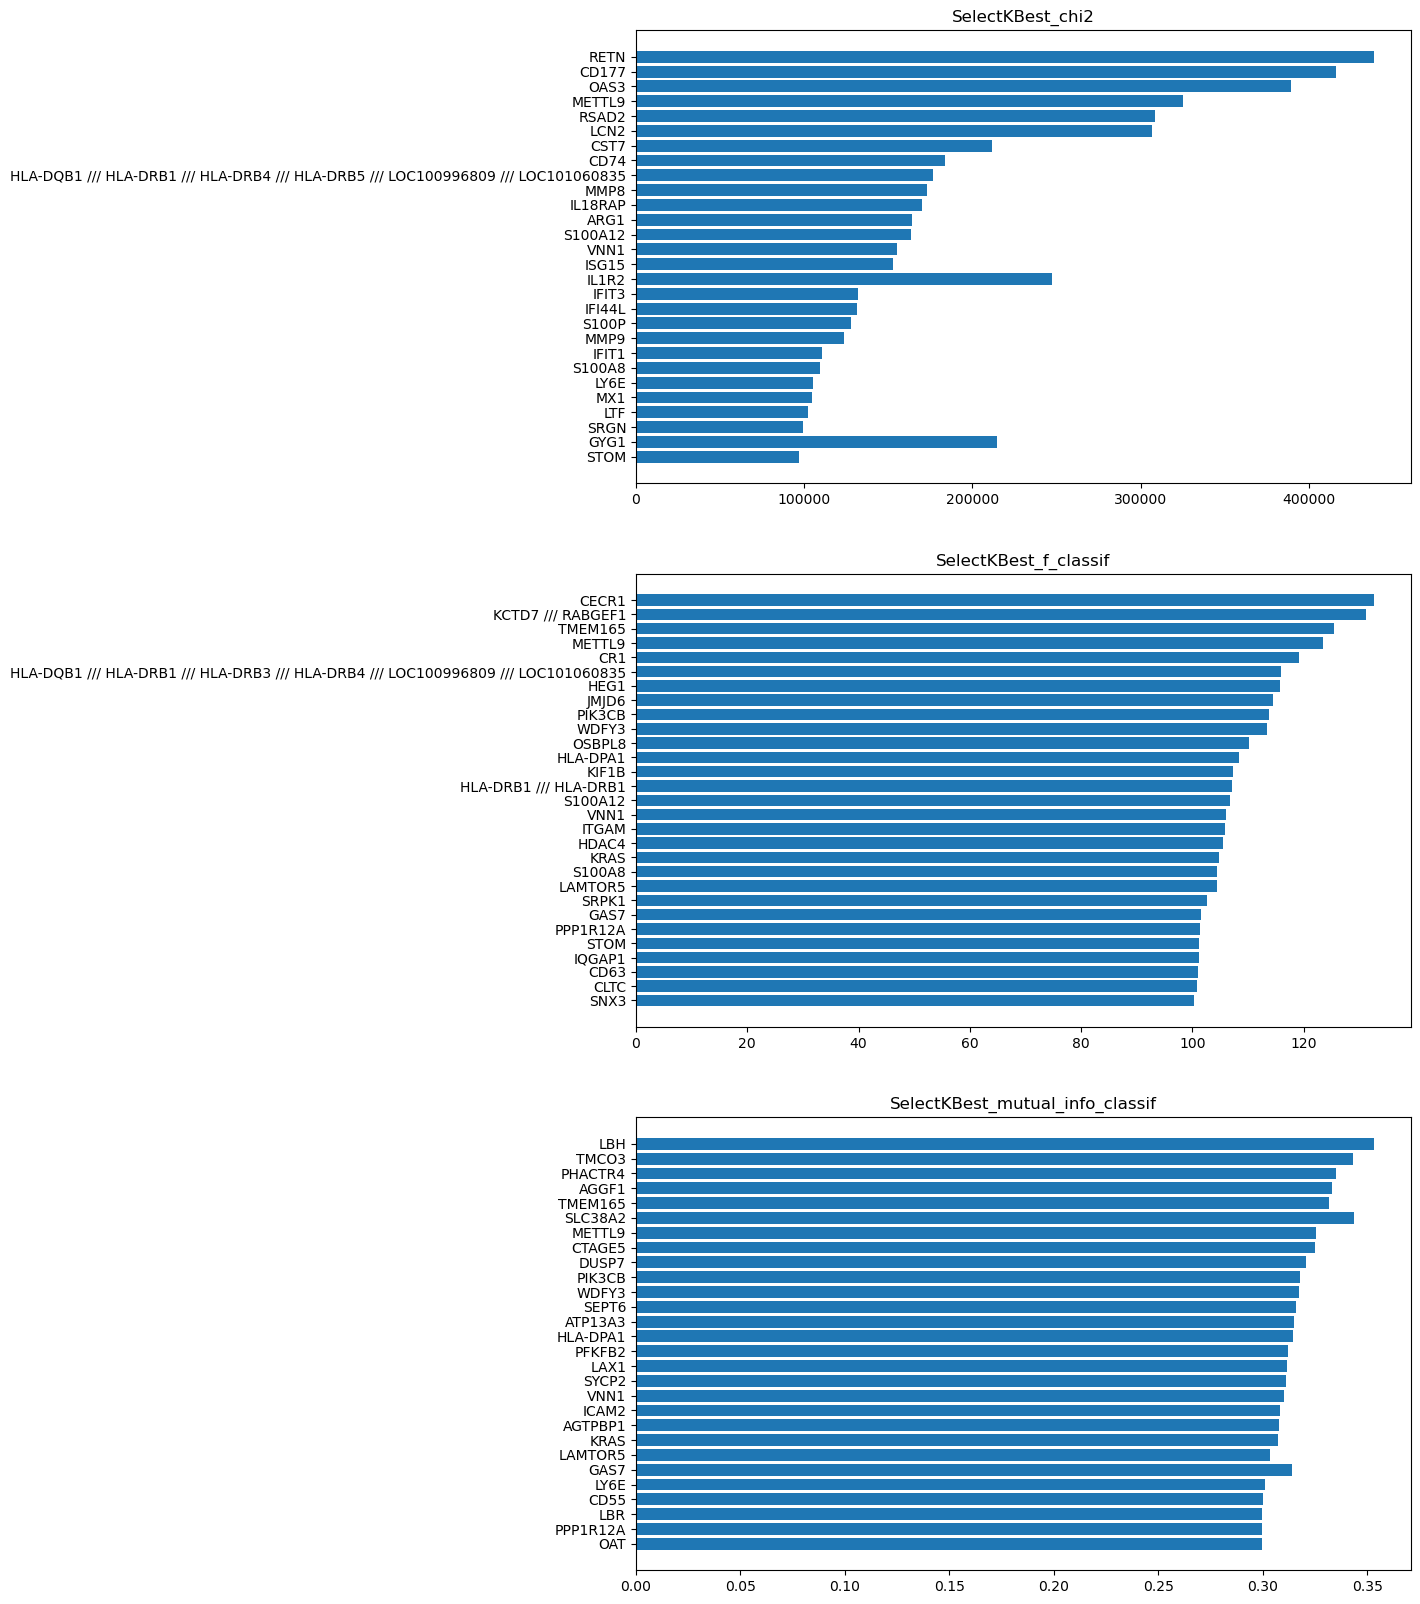

In [17]:
# draw the importance of the features selected by SelectKBest

fig, ax = plt.subplots(len(select), 1, figsize=(10, 20))
for i in range(len(select)):
    # ax[i].barh(X_train.columns[select[i].get_support()], sorted(select[i].scores_[select[i].get_support()]))
    # ax[i].set_title(select_name[i])
    # should use the gene name instead of the ID. To get the gene name, we need to use the GPL571 table like below:
    # GPL571.table[GPL571.table['ID'] == X_train.columns[i]]['Gene Symbol'].values[0]
    ax[i].barh([GPL571.table[GPL571.table['ID'] == X_train.columns[i]]['Gene Symbol'].values[0] for i in select[i].get_support(indices=True)], sorted(select[i].scores_[select[i].get_support()]))
    ax[i].set_title(select_name[i])
plt.show()

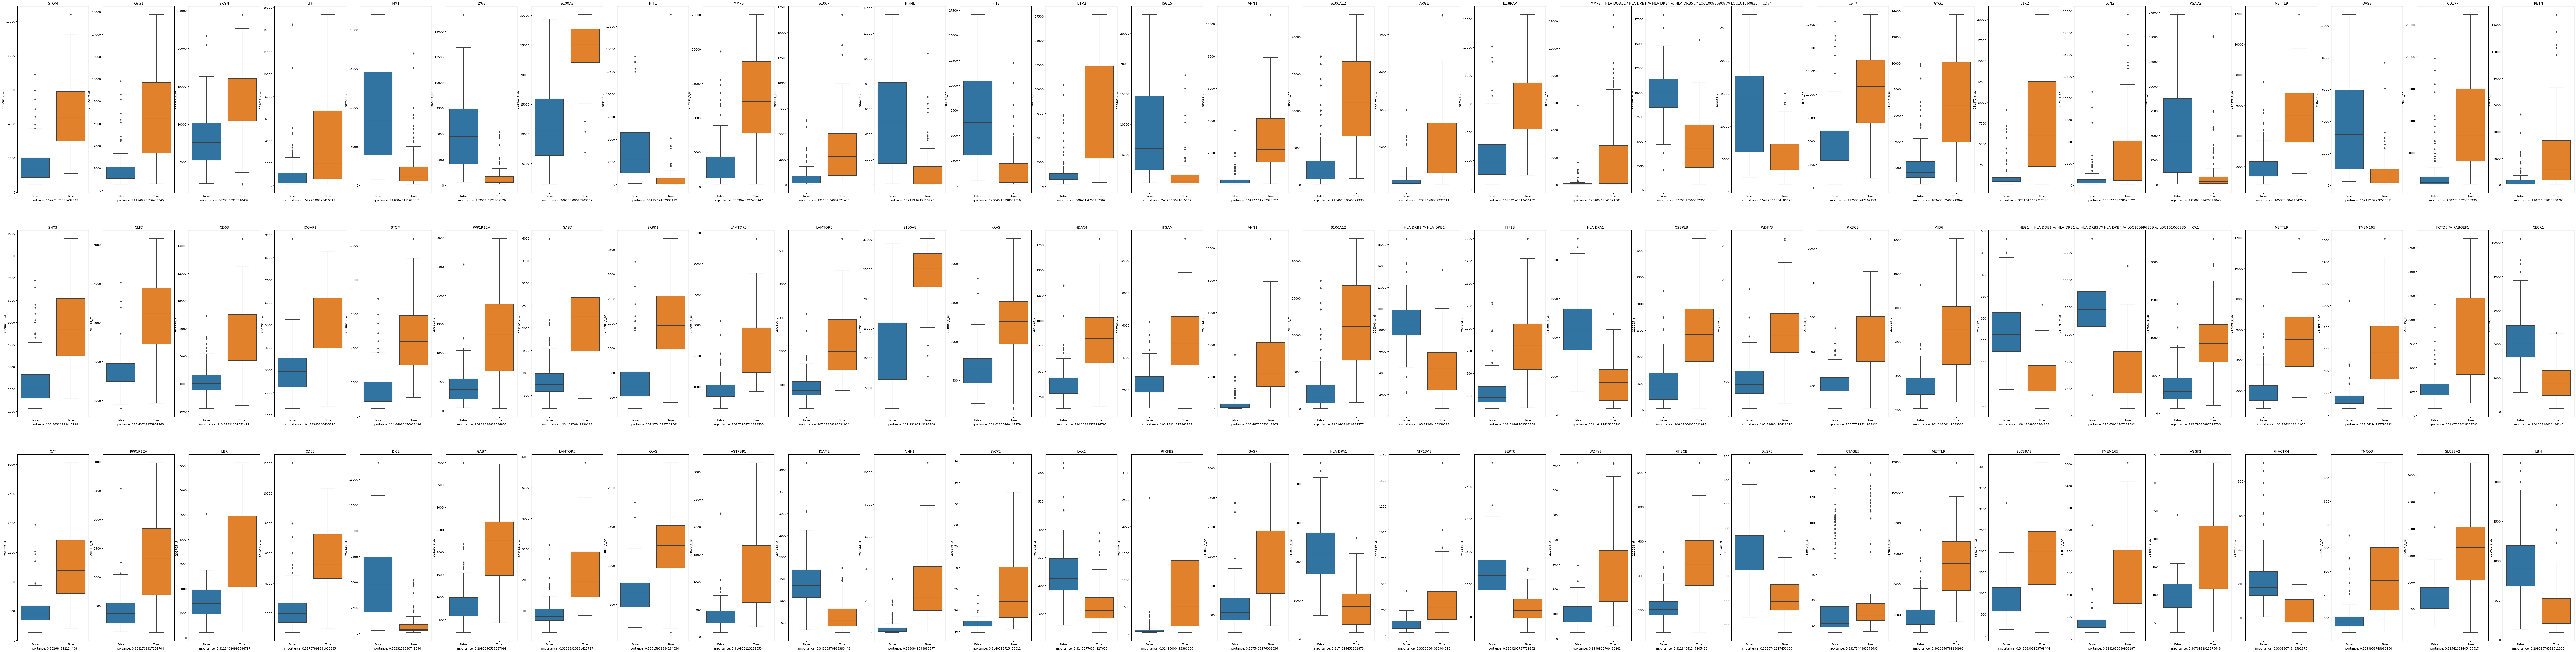

In [18]:
# for each gene selected, draw the boxplot of the expression level of the gene in the two groups
# map the values of the column 'infection_status' to 'viral' and 'bacterial'
# False: viral, True: bacterial
fig, ax = plt.subplots(len(select), 30, figsize=(160, 40))
for i in range(len(select)):
    for j in range(30):
        sns.boxplot(x='infection_status', y=X_train.columns[select[i].get_support(indices=True)[j]], data=gse_csv, ax=ax[i][j])
        ax[i][j].set_title(GPL571.table[GPL571.table['ID'] == X_train.columns[select[i].get_support(indices=True)[j]]]['Gene Symbol'].values[0])
        # also add importance of the gene
        ax[i][j].set_xlabel('importance: ' + str(select[i].scores_[select[i].get_support(indices=True)[j]]))

plt.show()


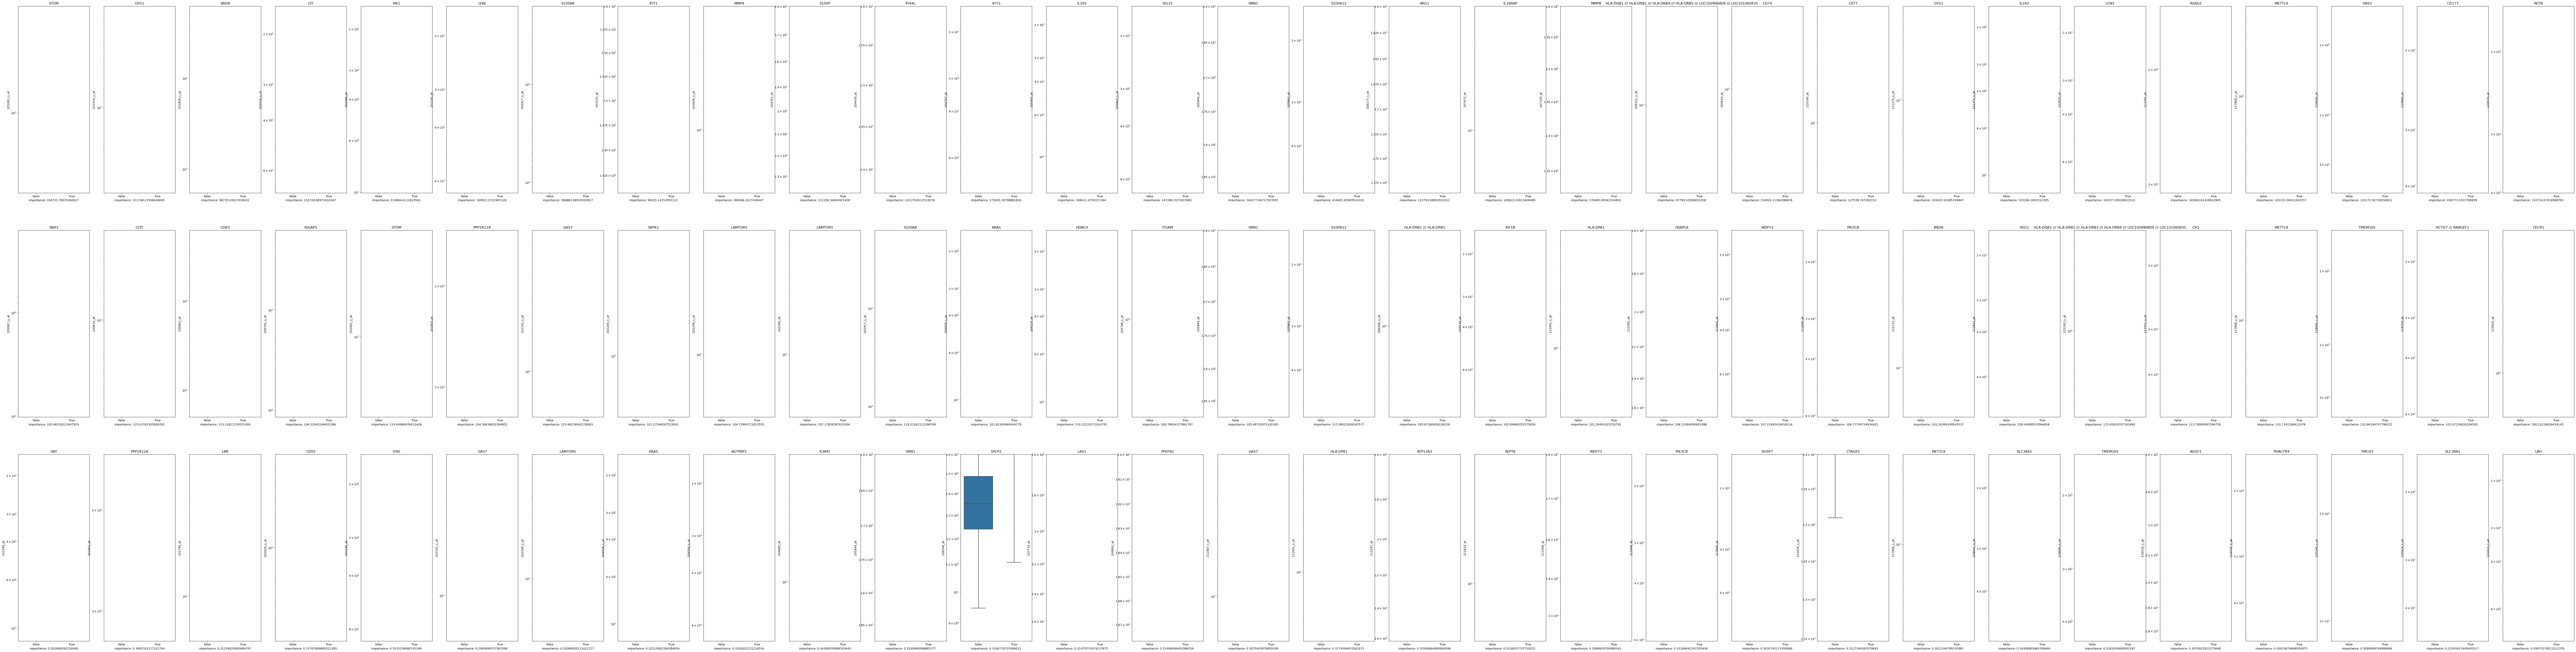

In [19]:
fig, ax = plt.subplots(len(select), 30, figsize=(160, 40))
for i in range(len(select)):
    for j in range(30):
        sns.boxplot(x='infection_status', y=X_train.columns[select[i].get_support(indices=True)[j]], data=gse_csv, ax=ax[i][j])
        ax[i][j].set_title(GPL571.table[GPL571.table['ID'] == X_train.columns[select[i].get_support(indices=True)[j]]]['Gene Symbol'].values[0])
        # also add importance of the gene
        ax[i][j].set_xlabel('importance: ' + str(select[i].scores_[select[i].get_support(indices=True)[j]]))
        #对数坐标
        ax[i][j].set_yscale('log')
        # 区间 0-16
        ax[i][j].set_ylim(0, 16)
plt.show()

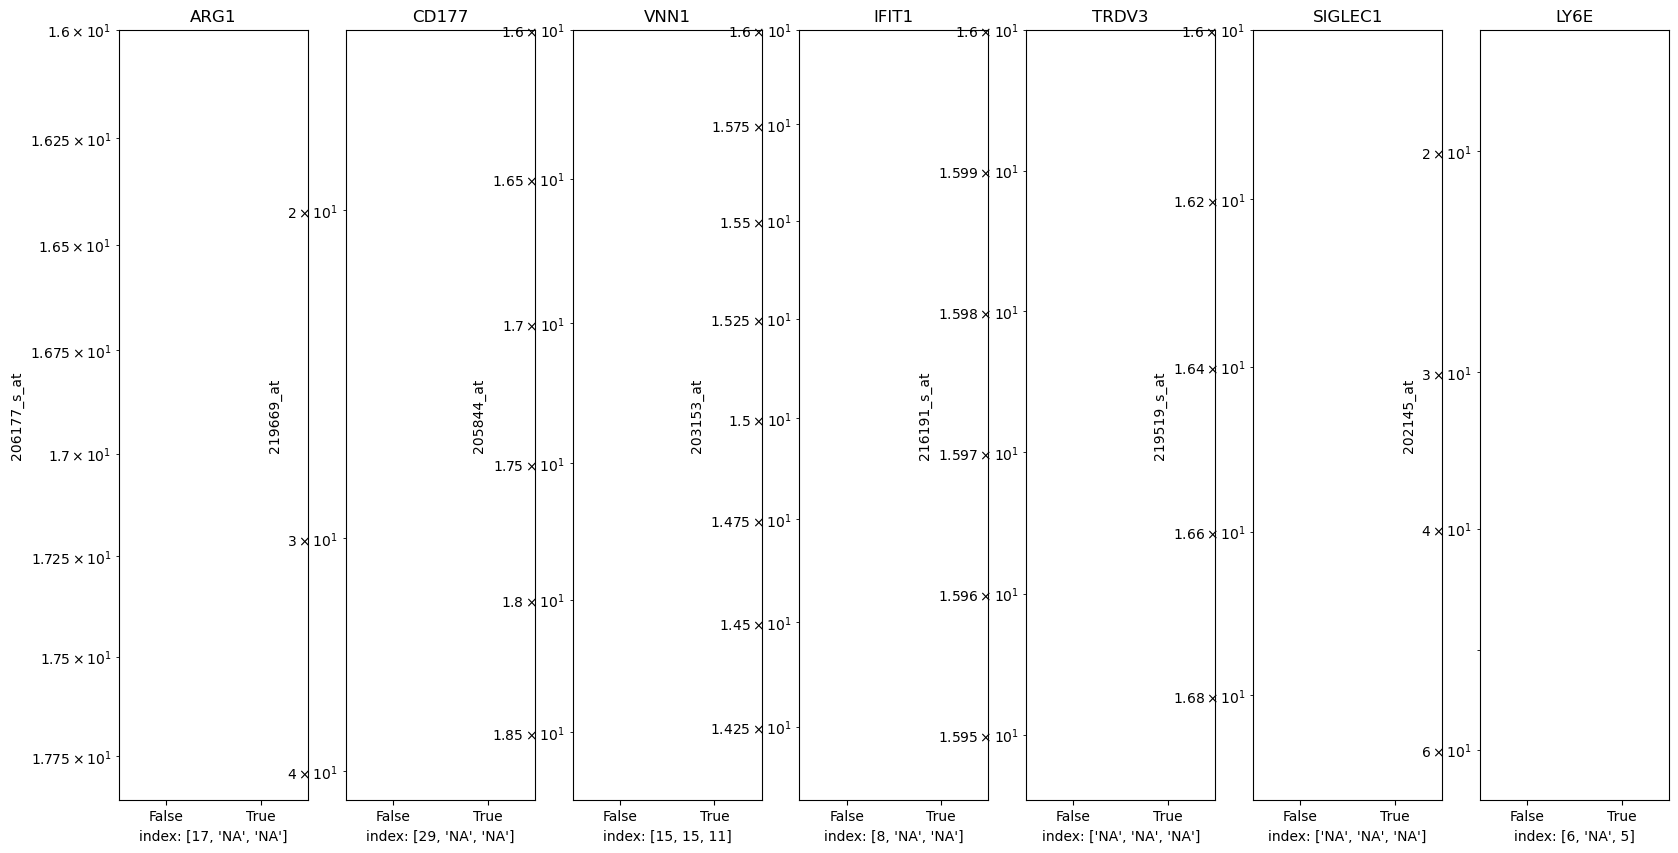

In [ ]:
Gene_name_theirs = ["ARG1","CD177","VNN1","IFIT1","TRDV3","SIGLEC1","LY6E"]
Gene_id_theirs = [GPL571.table[GPL571.table['Gene Symbol'] == i]['ID'].values[0] for i in Gene_name_theirs]

fix, ax = plt.subplots(1, len(Gene_name_theirs), figsize=(20, 10))
for i in range(len(Gene_name_theirs)):
    sns.boxplot(x='infection_status', y=Gene_id_theirs[i], data=gse_csv, ax=ax[i])
    ax[i].set_title(Gene_name_theirs[i])
    # also add importance of the gene, in 3 lines, we need to find the index of the gene in the selected genes
    # then we can get the importance of the gene
    index = []
    for j in range(len(select)):
        if Gene_id_theirs[i] in X_train.columns[select[j].get_support(indices=True)]:
            # add 1 to the index, because the index starts from 0
            index.append(X_train.columns[select[j].get_support(indices=True)].tolist().index(Gene_id_theirs[i]) + 1)
        else:
            index.append('NA')
    ax[i].set_xlabel('index: ' + str(index))
    #对数坐标
    ax[i].set_yscale('log')

plt.show()


In [21]:
# use RandomForestClassifier to train the data and test the data
rfc = RandomForestClassifier()
rfc.fit(X_train, y_train)
y_test = rfc.predict(X_test)
print("Using RandomForestClassifier to train the data and test the data")
print("Accuracy: ", accuracy_score(y_train, y_pred))
print("Confusion Matrix: \n", confusion_matrix(y_train, y_pred))
print("Classification Report: \n", classification_report(y_train, y_pred))

Using RandomForestClassifier to train the data and test the data
Accuracy:  0.9144736842105263
Confusion Matrix: 
 [[88  5]
 [ 8 51]]
Classification Report: 
               precision    recall  f1-score   support

       False       0.92      0.95      0.93        93
        True       0.91      0.86      0.89        59

    accuracy                           0.91       152
   macro avg       0.91      0.91      0.91       152
weighted avg       0.91      0.91      0.91       152



In [22]:
# Feature Importance
# Show the IDs of the top 30 features, and then translate them into gene names, and then draw a bar chart
new_data = pd.DataFrame()

for i in rfc.feature_importances_.argsort()[-30:][::-1]: # 选出重要性最高的30个特征
    new_data[X_train.columns[i]] = X_train[X_train.columns[i]]
    genename = GPL571.table[GPL571.table['ID'] == X_train.columns[i]]['Gene Symbol'].values[0]
    if genename == '':
        genename = X_train.columns[i]
    new_data.rename(columns={X_train.columns[i]: genename}, inplace=True)

new_data.head()


,HPGD,ATP13A3,METTL9,SLC38A2,HPGD,CD63,GHITM,NDST2,USP11,HEG1,...,PJA2,PDS5B,CD79A,CSGALNACT2,MAN1A1,ZFR,HLA-DMA,KL,TMEM165,ADAM10
58,66.992285,306.790446,7624.003626,1488.048991,20.142956,9872.356109,1091.339509,1321.739161,258.408688,138.588542,...,646.179272,231.772080,369.412569,1357.054062,860.789232,358.117112,286.280996,20.532170,565.181135,177.801516
42,2204.252193,618.576294,7092.258719,3219.201819,447.161563,9017.595866,2016.087082,1868.781471,164.483780,137.229470,...,1702.669548,334.793837,122.357895,3611.431122,1317.992943,541.088029,341.810642,37.008574,1077.796768,455.868614
128,895.458622,436.320215,5721.877199,3134.879122,149.308112,7279.186788,1598.472490,1362.026729,196.887547,137.550602,...,2071.717378,483.501019,220.588894,2199.952014,2333.101020,640.316897,653.250502,50.984976,1040.273865,386.349002
67,42.857534,127.062462,2335.404798,861.766598,16.369350,4457.801465,1458.292758,468.783070,169.446326,200.670364,...,395.231756,240.984858,237.643046,493.575162,249.449129,293.766162,3020.218791,8.996775,91.023844,207.446593
210,30.938373,40.381799,1040.820931,145.279159,29.722924,2215.256994,444.709836,611.435214,437.733676,254.886640,...,192.820230,64.804456,829.135531,43.566837,52.286389,103.378919,1934.975257,12.431148,83.655019,58.612676


test different models

In [23]:
# Use linear regression to train the data and test the data
from sklearn.linear_model import LinearRegression
lr = LinearRegression()
lr.fit(X_train, y_train)
y_pred = lr.predict(X_test)
print("train_acc: ", lr.score(X_train, y_train))
print("test_acc: ", lr.score(X_test, y_test))

train_acc:  1.0
test_acc:  0.6493687658563009


In [24]:
from sklearn.linear_model import LinearRegression
lr = LinearRegression()
for i in range(len(select)):
    X_train, X_test, y_train, y_test = train_test_split(final_data, final_target, test_size=0.2, random_state=42)
    lr.fit(X_train.iloc[:, select[i].get_support(indices=True)], y_train)
    y_pred = lr.predict(X_test.iloc[:, select[i].get_support(indices=True)])
    print("Using " + str(select[i].get_support(indices=True).shape[0]) + " features selected by " + str(select_name[i]))
    print("train_acc: ", lr.score(X_train.iloc[:, select[i].get_support(indices=True)], y_train))
    print("test_acc: ", lr.score(X_test.iloc[:, select[i].get_support(indices=True)], y_test))

Using 30 features selected by SelectKBest_chi2
train_acc:  0.6452984427492228
test_acc:  0.5751537562765733
Using 30 features selected by SelectKBest_f_classif
train_acc:  0.7048046368694909
test_acc:  0.669010449983711
Using 30 features selected by SelectKBest_mutual_info_classif
train_acc:  0.662707816460633
test_acc:  0.7408897146206073


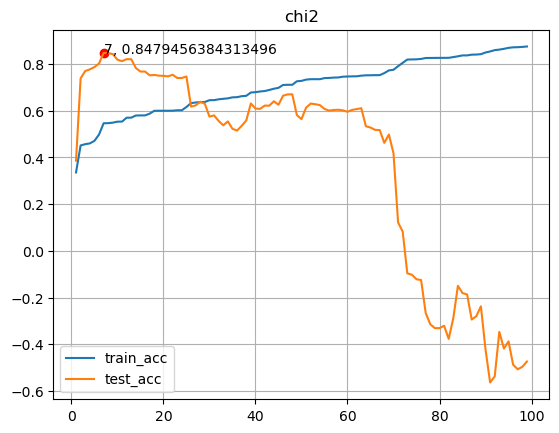

In [25]:
from sklearn.linear_model import LinearRegression
lr = LinearRegression()
train_acc = []
test_acc = []
for i in range(1, 100):
    X_train, X_test, y_train, y_test = train_test_split(final_data, final_target, test_size=0.2, random_state=42)
    # reselect the features
    reselect = SelectKBest(score_func=chi2, k=i)
    reselect.fit(X_train, y_train)
    lr.fit(X_train.iloc[:, reselect.get_support(indices=True)], y_train) # use the selected features to train the data
    y_pred = lr.predict(X_test.iloc[:, reselect.get_support(indices=True)])
    train_acc.append(lr.score(X_train.iloc[:, reselect.get_support(indices=True)], y_train))
    test_acc.append(lr.score(X_test.iloc[:, reselect.get_support(indices=True)], y_test))

# draw a line chart
plt.plot(range(1, 100), train_acc, label='train_acc')
plt.plot(range(1, 100), test_acc, label='test_acc')
plt.title('chi2')
plt.legend()
# grid
plt.grid()
# mark the maximum value
plt.scatter(test_acc.index(max(test_acc)) + 1, max(test_acc), marker='o', color='r')
plt.text(test_acc.index(max(test_acc)) + 1, max(test_acc), str(test_acc.index(max(test_acc)) + 1) + ', ' + str(max(test_acc)))
plt.show()



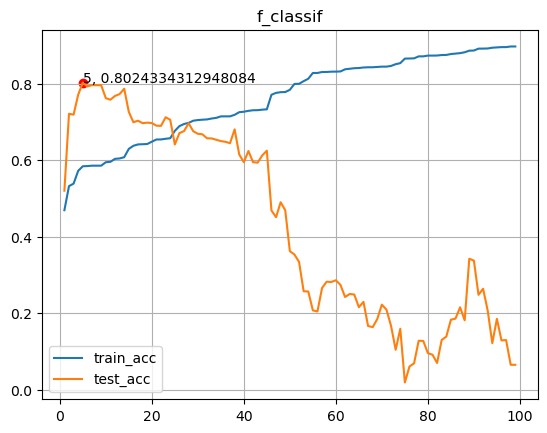

In [26]:
train_acc = []
test_acc = []
for i in range(1, 100):
    X_train, X_test, y_train, y_test = train_test_split(final_data, final_target, test_size=0.2, random_state=42)
    # reselect the features
    reselect = SelectKBest(score_func=f_classif, k=i)
    reselect.fit(X_train, y_train)
    lr.fit(X_train.iloc[:, reselect.get_support(indices=True)], y_train)
    y_pred = lr.predict(X_test.iloc[:, reselect.get_support(indices=True)])
    train_acc.append(lr.score(X_train.iloc[:, reselect.get_support(indices=True)], y_train))
    test_acc.append(lr.score(X_test.iloc[:, reselect.get_support(indices=True)], y_test))

# draw a line chart
plt.plot(range(1, 100), train_acc, label='train_acc')
plt.plot(range(1, 100), test_acc, label='test_acc')
plt.title('f_classif')
plt.legend()
# grid
plt.grid()
# mark the maximum value
plt.scatter(test_acc.index(max(test_acc)) + 1, max(test_acc), marker='o', color='r')
plt.text(test_acc.index(max(test_acc)) + 1, max(test_acc), str(test_acc.index(max(test_acc)) + 1) + ', ' + str(max(test_acc)))
plt.show()

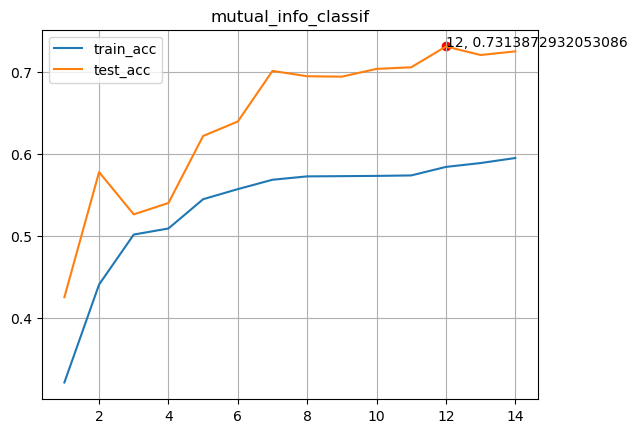

In [27]:
train_acc = []
test_acc = []
for i in range(1, 15):
    X_train, X_test, y_train, y_test = train_test_split(final_data, final_target, test_size=0.2, random_state=42)
    # reselect the features
    reselect = SelectKBest(score_func=mutual_info_classif, k=i)
    reselect.fit(X_train, y_train)
    lr.fit(X_train.iloc[:, reselect.get_support(indices=True)], y_train)
    y_pred = lr.predict(X_test.iloc[:, reselect.get_support(indices=True)])
    train_acc.append(lr.score(X_train.iloc[:, reselect.get_support(indices=True)], y_train))
    test_acc.append(lr.score(X_test.iloc[:, reselect.get_support(indices=True)], y_test))

# draw a line chart
plt.plot(range(1, 15), train_acc, label='train_acc')
plt.plot(range(1, 15), test_acc, label='test_acc')
plt.title('mutual_info_classif')
plt.legend()
# grid
plt.grid()
# mark the maximum value
plt.scatter(test_acc.index(max(test_acc)) + 1, max(test_acc), marker='o', color='r')
plt.text(test_acc.index(max(test_acc)) + 1, max(test_acc), str(test_acc.index(max(test_acc)) + 1) + ', ' + str(max(test_acc)))
plt.show()

In [28]:
# so, use f_classif and 5 features to train the data and test the data
from sklearn.linear_model import LinearRegression
lr = LinearRegression()
X_train, X_test, y_train, y_test = train_test_split(final_data, final_target, test_size=0.2, random_state=42)
# reselect the features
reselect = SelectKBest(score_func=f_classif, k=5)
reselect.fit(X_train, y_train)
lr.fit(X_train.iloc[:, reselect.get_support(indices=True)], y_train)
y_pred = lr.predict(X_test.iloc[:, reselect.get_support(indices=True)])
print("train_acc: ", lr.score(X_train.iloc[:, reselect.get_support(indices=True)], y_train))
print("test_acc: ", lr.score(X_test.iloc[:, reselect.get_support(indices=True)], y_test))

train_acc:  0.5841087106477172
test_acc:  0.8024334312948084


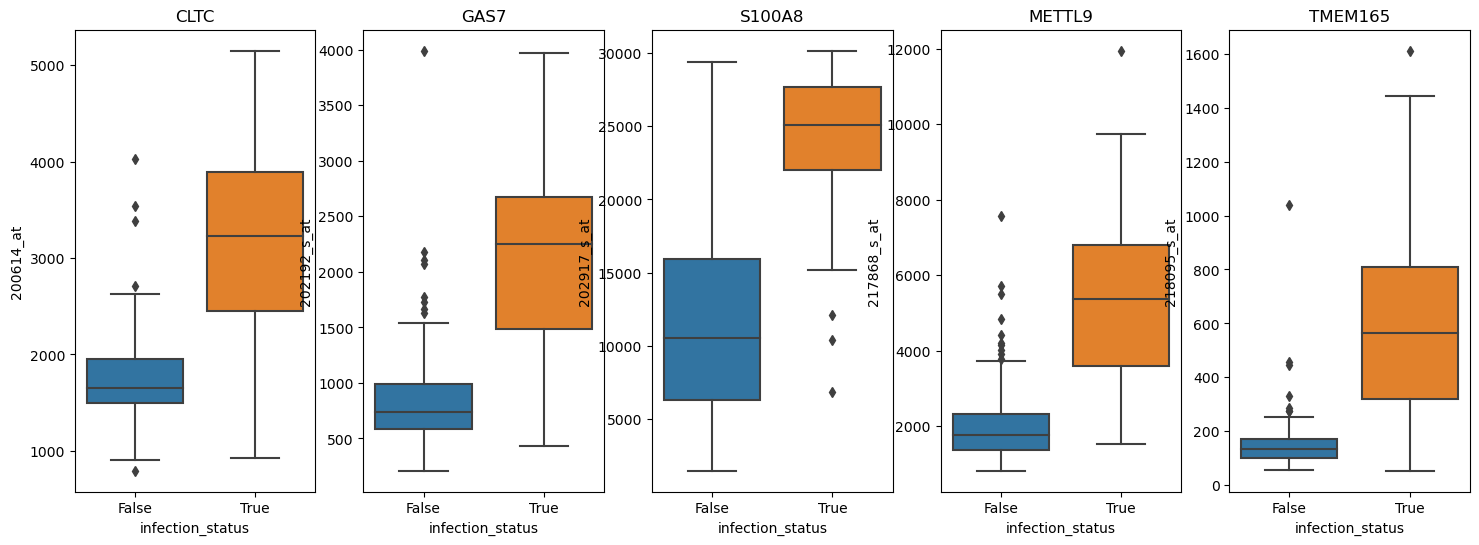

In [29]:
fig, ax = plt.subplots(1, 5, figsize=(18, 6))
for i in range(5):
    sns.boxplot(x='infection_status', y=X_train.columns[reselect.get_support(indices=True)][i], data=gse_csv, ax=ax[i])
    ax[i].set_title(GPL571.table[GPL571.table['ID'] == X_train.columns[reselect.get_support(indices=True)][i]]['Gene Symbol'].values[0])
plt.show()

In [30]:
# so, use f_classif and 5 features to train the data and test the data
from sklearn.linear_model import LinearRegression
lr = LinearRegression(
    fit_intercept=False,
    normalize=False,
    copy_X=False)
# Limit the coefficients between +-1:
X_train, X_test, y_train, y_test = train_test_split(final_data, final_target, test_size=0.2, random_state=42)
y_train = 2*(y_train - 0.5)
y_test = 2*(y_test - 0.5)
# reselect the features
reselect = SelectKBest(score_func=f_classif, k=5)
reselect.fit(X_train, y_train)
lr.fit(X_train.iloc[:, reselect.get_support(indices=True)], y_train)
y_pred = lr.predict(X_test.iloc[:, reselect.get_support(indices=True)])
print("train_acc: ", lr.score(X_train.iloc[:, reselect.get_support(indices=True)], y_train))
print("test_acc: ", lr.score(X_test.iloc[:, reselect.get_support(indices=True)], y_test))

# from the lr we get the coefficients
print(lr.coef_)
# get the gene symbol
gene_symbol = []
for i in range(5):
    gene_symbol.append(GPL571.table[GPL571.table['ID'] == X_train.columns[reselect.get_support(indices=True)][i]]['Gene Symbol'].values[0])
print(gene_symbol)

train_acc:  0.3856342495506532
test_acc:  0.54231887013405
[-6.98338654e-04  4.27778928e-04 -1.32316456e-05  1.07153387e-04
  2.35867713e-03]
['CLTC', 'GAS7', 'S100A8', 'METTL9', 'TMEM165']


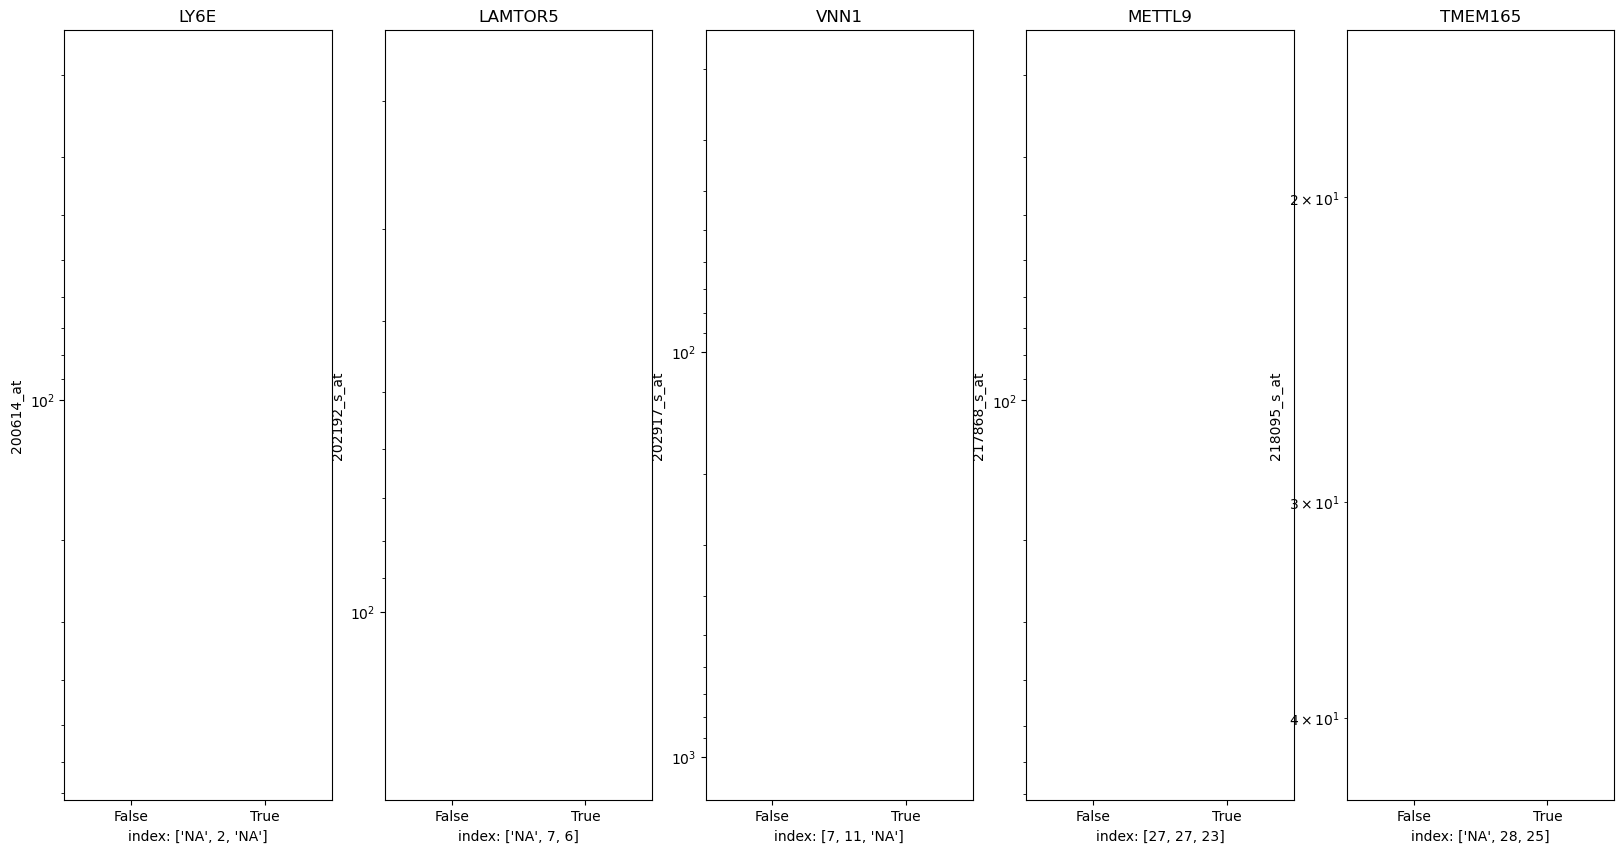

In [31]:
Gene_name_ours = ['LY6E', 'LAMTOR5', 'VNN1', 'METTL9', 'TMEM165']
Gene_id_ours = X_train.columns[reselect.get_support(indices=True)].tolist()

fix, ax = plt.subplots(1, len(Gene_name_ours), figsize=(20, 10))
for i in range(len(Gene_name_ours)):
    sns.boxplot(x='infection_status', y=Gene_id_ours[i], data=gse_csv, ax=ax[i])
    ax[i].set_title(Gene_name_ours[i])
    # also add importance of the gene, in 3 lines, we need to find the index of the gene in the selected genes
    # then we can get the importance of the gene
    index = []
    for j in range(len(select)):
        if Gene_id_ours[i] in X_train.columns[select[j].get_support(indices=True)]:
            # add 1 to the index, because the index starts from 0
            index.append(X_train.columns[select[j].get_support(indices=True)].tolist().index(Gene_id_ours[i]) + 1)
        else:
            index.append('NA')
    ax[i].set_xlabel('index: ' + str(index))
    #对数坐标
    ax[i].set_yscale('log')
    # 区间 0-16
    ax[i].set_ylim(0, 16)
plt.show()

0 [-0.  0. -0.  0.  0.] 0.631578947368421


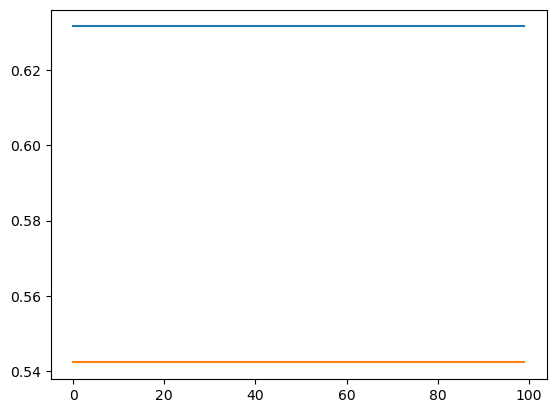

In [32]:
# draw a line chart
test_acc = []
coefs = []
for times in range(0, 100):
    coef = np.round(times*lr.coef_, 0)
    if times == 0:
        printcoef = 1
    elif np.sum(coef == coefs[-1]) == 5:
        printcoef = 0
    else:
        printcoef = 1
    coefs.append(coef)
    y_pred01 = np.zeros(len(y_test))
    for i in range(len(y_pred)):
        y_pred[i] = 0
        for j in range(5):
            y_pred[i] += X_test.iloc[:, reselect.get_support(indices=True)].values[i][j] * coef[j]
        if y_pred[i] > 0:
            y_pred01[i] = 1
        else:
            y_pred01[i] = -1
    test_acc.append(np.sum(y_pred01 == y_test.values) / len(y_pred01))
    if printcoef:
        print(times, coef, test_acc[times])

plt.plot(range(100), test_acc, label='test_acc')
# draw a line of lr.score(X_test.iloc[:, reselect.get_support(indices=True)], y_test)
plt.plot(range(100), [lr.score(X_test.iloc[:, reselect.get_support(indices=True)], y_test)]*100, label='lr.score')

### 用GSE6269测试测试

这结果太好我不敢相信（）

In [33]:
# import the data GSE6269
test_data = pd.read_csv('GSE6269.csv')
test_data.head()

,infection_status,1007_s_at,1053_at,117_at,121_at,1255_g_at,1294_at,1316_at,1320_at,1405_i_at,...,hmm9678-S,hmm9715-S,hmm9738-S,hmm974-S,hmm9750-S,hmm9917-S,hmm9988-S,lysA,pheA,thrB
0,Influenza A,306.2,727.1,998.5,808.3,6.3,1385.7,62.4,13.9,6083.6,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Influenza A,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,9.8,6.4,-0.8,5.1,-6.6,27.3,-7.2,7.2,-0.1,2.1
2,Influenza B,313.4,540.3,510.3,594.6,12.9,2305.4,142.6,15.4,28163.7,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,"S. aureus, MSSA",371.3,183.9,125.7,1375.1,8.2,754.6,132.6,19.7,5801.7,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,S. pneumoniae,505.6,197.8,310.3,1278.3,53.6,828.9,122.5,103.7,4022.6,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [34]:
test_data.isnull().sum() 

infection_status      0
1007_s_at            24
1053_at              24
117_at               24
121_at               24
                   ... 
hmm9917-S           119
hmm9988-S           119
lysA                119
pheA                119
thrB                119
Length: 101974, dtype: int64

In [35]:
test_data.info() 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 143 entries, 0 to 142
Columns: 101974 entries, infection_status to thrB
dtypes: float64(101973), object(1)
memory usage: 111.3+ MB


In [36]:
test_data['infection_status'].value_counts() 

S. aureus, MRSA    30
Influenza A        30
E. coli            29
S. pneumoniae      22
S. aureus, MSSA    20
Influenza B         6
None                6
Name: infection_status, dtype: int64

In [37]:
# S. aureus, MRSA    30
# Influenza A        30
# E. coli            29
# S. pneumoniae      22
# S. aureus, MSSA    20
# Influenza B         6
# None                6
# Drop the None, and map the others to 0 and 1, 0 for viral, 1 for bacterial
test_data = test_data.dropna(subset=['infection_status'])
test_data = test_data[test_data['infection_status'] != 'None']
test_data['infection_status'] = test_data['infection_status'].map(
    {'S. aureus, MRSA': 1,'Influenza A': -1, 'E. coli': 1, 'S. pneumoniae': 1, 'S. aureus, MSSA': 1, 'Influenza B': -1})

test_data.head()

,infection_status,1007_s_at,1053_at,117_at,121_at,1255_g_at,1294_at,1316_at,1320_at,1405_i_at,...,hmm9678-S,hmm9715-S,hmm9738-S,hmm974-S,hmm9750-S,hmm9917-S,hmm9988-S,lysA,pheA,thrB
0,-1,306.2,727.1,998.5,808.3,6.3,1385.7,62.4,13.9,6083.6,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,-1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,9.8,6.4,-0.8,5.1,-6.6,27.3,-7.2,7.2,-0.1,2.1
2,-1,313.4,540.3,510.3,594.6,12.9,2305.4,142.6,15.4,28163.7,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,1,371.3,183.9,125.7,1375.1,8.2,754.6,132.6,19.7,5801.7,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,1,505.6,197.8,310.3,1278.3,53.6,828.9,122.5,103.7,4022.6,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [38]:
# only use the selected features, Gene_id_ours and 'infection_status'
test_data_new = test_data[Gene_id_ours + ['infection_status']]
test_data_new.head()

,200614_at,202192_s_at,202917_s_at,217868_s_at,218095_s_at,infection_status
0,9745.8,1975.7,82153.3,15419.2,1647.2,-1
1,NaN,NaN,NaN,NaN,NaN,-1
2,6045.6,1233.2,32639.2,4088.0,614.6,-1
3,2417.7,1317.5,24192.9,4810.7,178.9,1
4,2455.9,1581.0,23021.2,4177.0,213.8,1


In [39]:
test_data_new.isnull().sum() 

200614_at           24
202192_s_at         24
202917_s_at         24
217868_s_at         24
218095_s_at         24
infection_status     0
dtype: int64

In [40]:
# remove na values
test_data_new = test_data_new.dropna()
test_data_new.isnull().sum()

test_data_new.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 113 entries, 0 to 141
Data columns (total 6 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   200614_at         113 non-null    float64
 1   202192_s_at       113 non-null    float64
 2   202917_s_at       113 non-null    float64
 3   217868_s_at       113 non-null    float64
 4   218095_s_at       113 non-null    float64
 5   infection_status  113 non-null    int64  
dtypes: float64(5), int64(1)
memory usage: 6.2 KB


test_acc:  0.9203539823008849


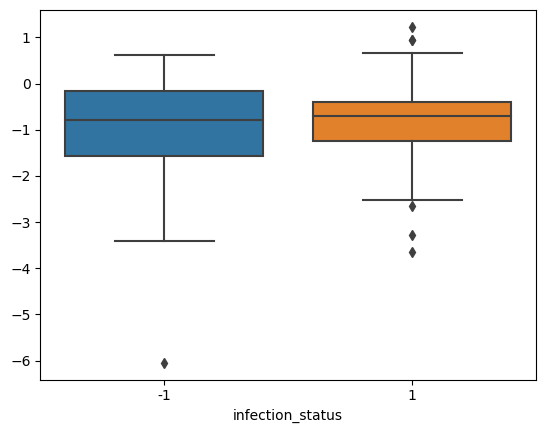

In [41]:
X_test_new = test_data_new[Gene_id_ours]
y_test_new = test_data_new['infection_status']

# use the model we trained before
y_pred_new = lr.predict(X_test_new)
y_pred01_new = np.zeros(len(y_pred_new))
sns.boxplot(x='infection_status', y=y_pred_new, data=test_data_new)
wrong = []
for i in range(len(y_pred)):
    if y_pred_new[i] > -500:
        y_pred01_new[i] = 1
    else:
        y_pred01_new[i] = -1
    if y_pred01_new[i] != y_test_new.values[i]:
        wrong.append(i)
print("test_acc: ", 1 - len(wrong) / len(y_pred01_new))

0 [-0.  0. -0.  0.  0.] 0.24778761061946908
1 [-0.  0. -0.  0.  0.] 0.752212389380531
2 [-0.  0. -0.  0.  0.] 0.752212389380531
3 [-0.  0. -0.  0.  0.] 0.752212389380531
4 [-0.  0. -0.  0.  0.] 0.752212389380531
5 [-0.  0. -0.  0.  0.] 0.752212389380531
6 [-0.  0. -0.  0.  0.] 0.752212389380531
7 [-0.  0. -0.  0.  0.] 0.752212389380531
8 [-0.  0. -0.  0.  0.] 0.752212389380531
9 [-0.  0. -0.  0.  0.] 0.752212389380531
10 [-0.  0. -0.  0.  0.] 0.752212389380531
11 [-0.  0. -0.  0.  0.] 0.752212389380531
12 [-0.  0. -0.  0.  0.] 0.752212389380531
13 [-0.  0. -0.  0.  0.] 0.752212389380531
14 [-0.  0. -0.  0.  0.] 0.752212389380531
15 [-0.  0. -0.  0.  0.] 0.752212389380531
16 [-0.  0. -0.  0.  0.] 0.752212389380531
17 [-0.  0. -0.  0.  0.] 0.752212389380531
18 [-0.  0. -0.  0.  0.] 0.752212389380531
19 [-0.  0. -0.  0.  0.] 0.752212389380531
20 [-0.  0. -0.  0.  0.] 0.752212389380531
21 [-0.  0. -0.  0.  0.] 0.752212389380531
22 [-0.  0. -0.  0.  0.] 0.752212389380531
23 [-0.  0. -0.  0.

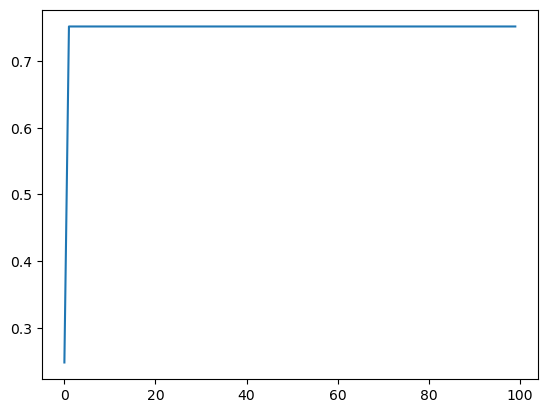

In [42]:
X_test_new = test_data_new[Gene_id_ours]
y_test_new = test_data_new['infection_status']
# use the model to predict the data
test_acc_new = []
coefs = []
for times in range(0, 100):
    coef = np.round(times*lr.coef_, 0)
    y_pred_new = np.zeros(len(y_test_new))
    y_pred01_new = np.zeros(len(y_test_new))
    wrong = []
    for i in range(len(y_test_new)):
        y_pred_new[i] = 0
        for j in range(5):
            y_pred_new[i] += X_test_new.values[i][j] * coef[j]
        if y_pred_new[i] > -1000 * times:
            y_pred01_new[i] = 1
        else:
            y_pred01_new[i] = -1
        if y_pred01_new[i] != y_test_new.values[i]:
            wrong.append(i)
    test_acc_new.append(1 - len(wrong) / len(y_test_new))
    print(times, coef, (1 - len(wrong) / len(y_test_new)))

plt.plot(range(100), test_acc_new, label='test_acc')

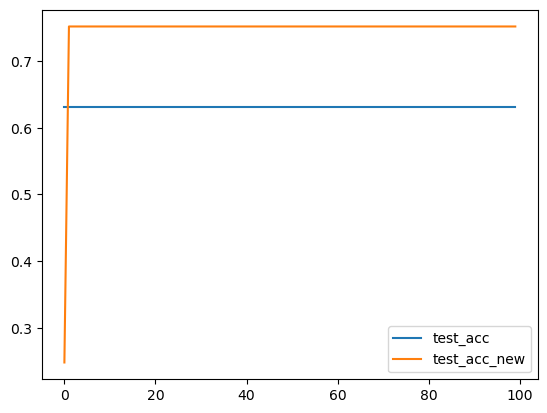

In [43]:
# draw the two line charts together
plt.plot(range(100), test_acc, label='test_acc')
plt.plot(range(100), test_acc_new, label='test_acc_new')
plt.legend()

剩下的

In [44]:
# test different models

logreg = LogisticRegression()
svc = SVC()
rfc = RandomForestClassifier()
knn = KNeighborsClassifier()
dtc = DecisionTreeClassifier()
gnb = GaussianNB()
# xgb = XGBClassifier()

models = [logreg, svc, rfc, knn, dtc, gnb]
# models = [logreg, svc, rfc, knn, dtc, gnb, xgb]

for model in models:
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    print(model)
    print('Accuracy: ', accuracy_score(y_test, y_pred))
    print('Confusion Matrix: ', confusion_matrix(y_test, y_pred))
    print('Classification Report: ', classification_report(y_test, y_pred))
    print('Cross Validation Score: ', cross_val_score(model, final_data, final_target, cv=5).mean())
    print('')

LogisticRegression()
Accuracy:  0.9473684210526315
Confusion Matrix:  [[23  1]
 [ 1 13]]
Classification Report:                precision    recall  f1-score   support

        -1.0       0.96      0.96      0.96        24
         1.0       0.93      0.93      0.93        14

    accuracy                           0.95        38
   macro avg       0.94      0.94      0.94        38
weighted avg       0.95      0.95      0.95        38

Cross Validation Score:  0.8368421052631578

SVC()
Accuracy:  0.9736842105263158
Confusion Matrix:  [[24  0]
 [ 1 13]]
Classification Report:                precision    recall  f1-score   support

        -1.0       0.96      1.00      0.98        24
         1.0       1.00      0.93      0.96        14

    accuracy                           0.97        38
   macro avg       0.98      0.96      0.97        38
weighted avg       0.97      0.97      0.97        38

Cross Validation Score:  0.8842105263157896

RandomForestClassifier()
Accuracy:  0.9736842

In [45]:
rfc = RandomForestClassifier( n_estimators=7, max_depth=1, random_state=0)
rfc.fit(X_train, y_train)
y_pred = rfc.predict(X_test)
print('Accuracy: ', accuracy_score(y_test, y_pred))
print('Confusion Matrix: ', confusion_matrix(y_test, y_pred))
print('Classification Report: ', classification_report(y_test, y_pred))
print('Cross Validation Score: ', cross_val_score(rfc, final_data, final_target, cv=5).mean())

Accuracy:  0.8947368421052632
Confusion Matrix:  [[24  0]
 [ 4 10]]
Classification Report:                precision    recall  f1-score   support

        -1.0       0.86      1.00      0.92        24
         1.0       1.00      0.71      0.83        14

    accuracy                           0.89        38
   macro avg       0.93      0.86      0.88        38
weighted avg       0.91      0.89      0.89        38

Cross Validation Score:  0.8157894736842104


In [46]:
# New a dataframe
# only keep the top 20 features
# and the column 'infection_status'
new_data = pd.DataFrame()
feature_importance = pd.Series(rfc.feature_importances_, index=X_train.columns)

for i in range(7):
    new_data[feature_importance.sort_values(ascending=False).index[i]] = final_data[feature_importance.sort_values(ascending=False).index[i]]
    new_data.rename(columns={feature_importance.sort_values(ascending=False).index[i]: GPL571.table[GPL571.table['ID'] == feature_importance.sort_values(ascending=False).index[i]]['Gene Symbol'].values[0]}, inplace=True)
new_data['infection_status'] = final_target
new_data.head()

,SLC9A6,ATP11B,RARRES3,TP53I3,FCER2,ARL4C,ATP13A3,infection_status
4,766.523328,1838.768435,319.027319,275.162044,32.488074,235.241208,245.477890,True
8,418.670260,1645.545155,981.700521,400.850306,45.724446,220.151711,256.155141,True
9,731.500876,2331.937650,310.588347,677.236222,38.805287,190.764902,813.221526,True
10,204.786902,452.226308,662.088451,233.242389,57.531870,428.674613,82.701053,False
11,366.342869,868.476972,673.217621,405.376744,144.031151,560.269396,356.359454,True


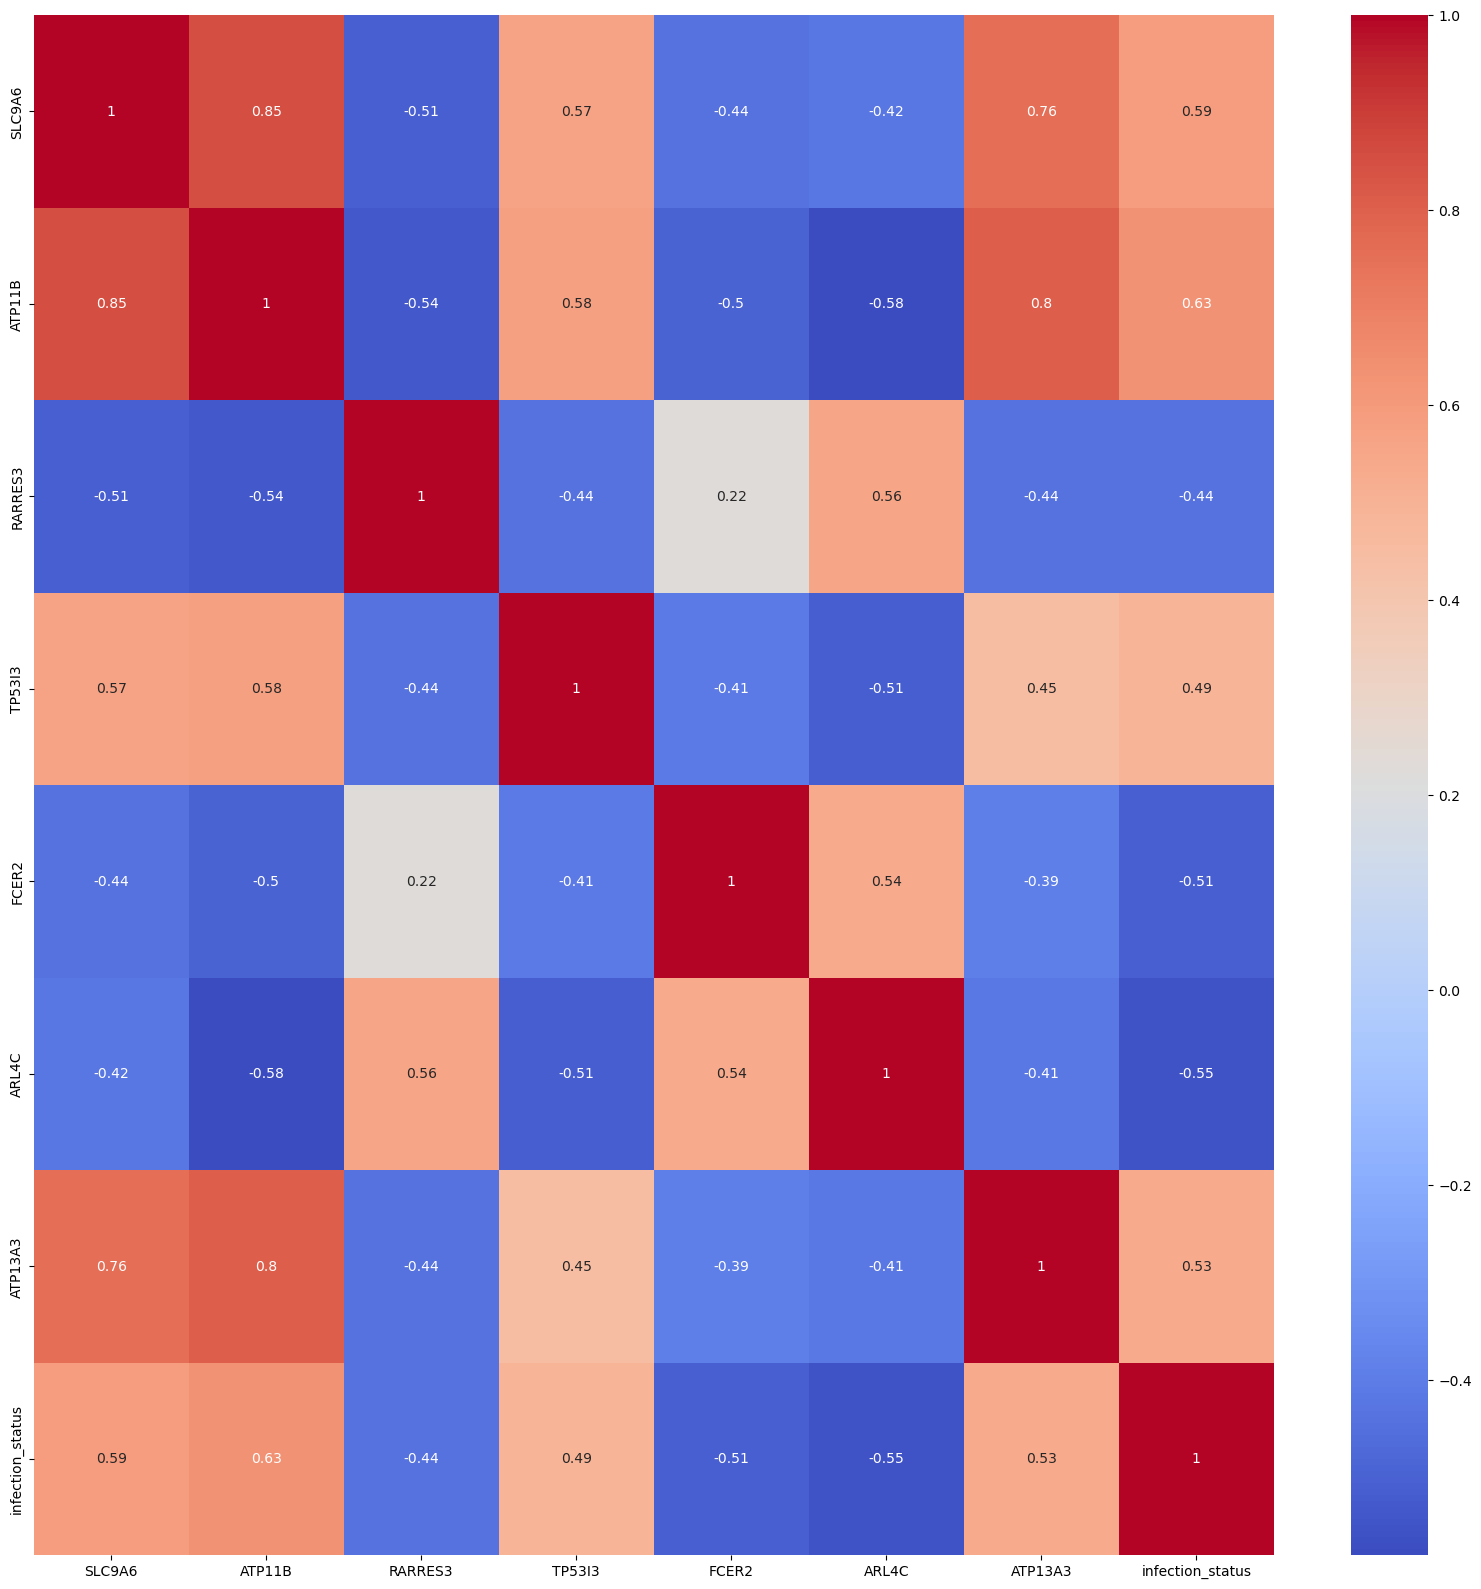

In [47]:
# draw the heatmap
plt.figure(figsize=(20, 20))
sns.heatmap(new_data.corr(), annot=True, cmap='coolwarm')
plt.show()

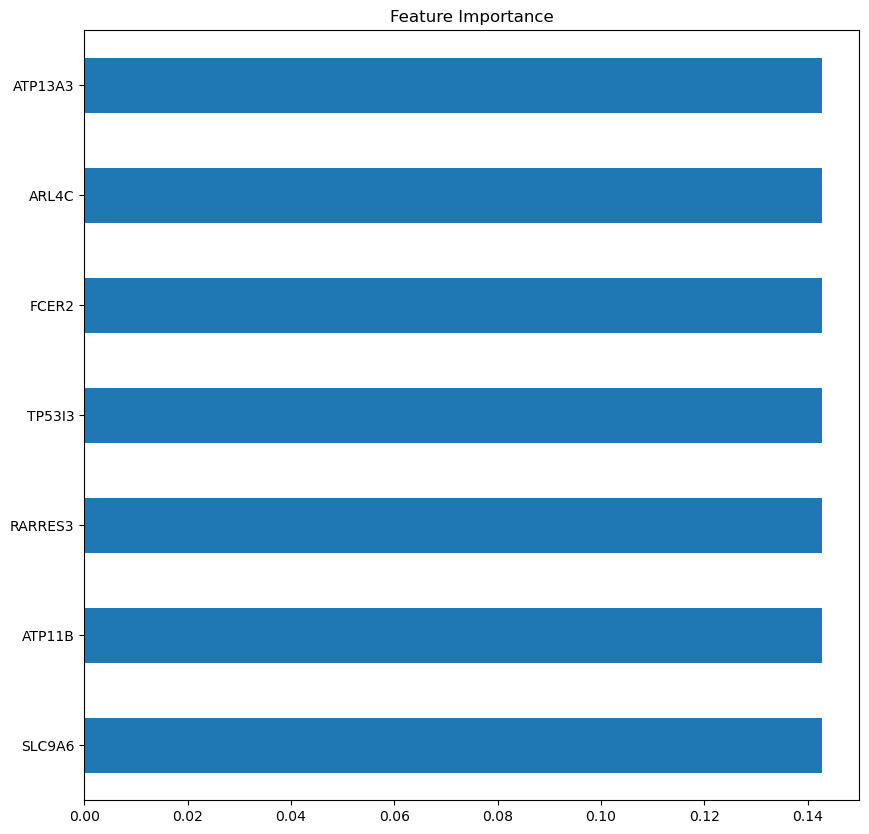

In [48]:
# Draw the importance of each feature with top 20 features with the help of RandomForestClassifier
feature_importance = pd.Series(rfc.feature_importances_, index=X_train.columns)

# the top 20 features should be translated to the gene names
feature_importance = feature_importance.sort_values(ascending=False)
feature_importance = feature_importance[:7]
for i in range(len(feature_importance)):
    Gene_Symbol = GPL571.table[GPL571.table['ID'] == feature_importance.index[i]]['Gene Symbol']
    if Gene_Symbol.empty:
        Gene_Symbol[0] = feature_importance.index[i]
    feature_importance.rename(index={feature_importance.index[i]: Gene_Symbol.values[0]}, inplace=True)
feature_importance.plot(kind='barh', figsize=(10, 10))
plt.title('Feature Importance')

plt.show()

In [49]:
# New a dataframe
# only keep the top 20 features
# and the column 'infection_status'
new_data = pd.DataFrame()
for i in range(len(feature_importance)):
    new_data[feature_importance.index[i]] = gse_csv[feature_importance.index[i]]
new_data['infection_status'] = gse_csv['infection_status']
new_data.head()

KeyError: 'SLC9A6'